In [1]:
import torch
import torch.nn as nn
import numpy as np

In [2]:
network = nn.Sequential(nn.Linear(13, 45), nn.ReLU(), nn.Linear(45, 40), nn.ReLU(), nn.Linear(40, 7))

In [3]:
database = torch.load("database.pt")

In [4]:
state = torch.tensor(database["state"], dtype = torch.float)
action = torch.tensor(database['action'].toarray(), dtype = torch.float)
reward = torch.tensor(database['reward'], dtype = torch.float)

In [5]:
state[0]

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4098e-02, 2.4307e-04,
        0.0000e+00, 2.4307e-03, 1.2153e-03, 2.1706e-01, 4.3582e-01, 8.7335e-01,
        0.0000e+00])

In [6]:
action[0]

tensor([0., 0., 1., 0., 0., 0., 0.])

In [7]:
reward[0]

tensor(5.)

In [8]:
state.shape

torch.Size([380691, 13])

In [9]:
action.shape

torch.Size([380691, 7])

In [10]:
reward.shape

torch.Size([380692])

In [11]:
torch.isnan(reward).sum()

tensor(0)

In [12]:
reward

tensor([ 5.0000, -3.0000,  0.0000,  ...,  5.0000,  0.0000, -0.9000])

In [13]:
dummy_reward = reward.clone()

In [14]:
dummy_reward = dummy_reward[:-1]

In [15]:
dummy_reward.shape

torch.Size([380691])

In [16]:
import matplotlib.pyplot as plt

# Q(s, a) = R + g*max(q(s', a))

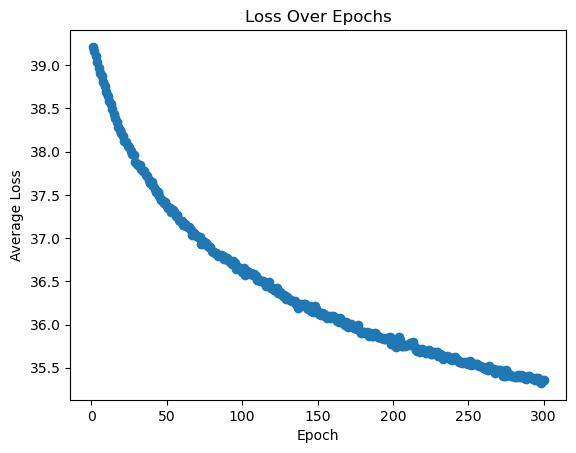

In [18]:
batch_size = 32
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(network.parameters())
big_loss_list = []

epochs = 300

for epoch in range(epochs):
    loss_list = []

    for batch_index in range(0, len(state), batch_size):
        state_batch = state[batch_index:batch_index + batch_size]
        reward_batch = dummy_reward[batch_index:batch_index + batch_size]
        action_batch = action[batch_index:batch_index + batch_size]

        q_pred = network(state_batch)
        q_true = reward_batch.unsqueeze(1).repeat(1, 7)
        q_true *= action_batch
        q_pred *= action_batch

        loss = loss_function(q_true, q_pred)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        loss_list.append(loss.item())

    epoch_loss = sum(loss_list) / len(loss_list)
    big_loss_list.append(epoch_loss)


plt.plot(range(1, epochs + 1), big_loss_list, marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.show()

In [23]:
!pip install torchsummary


In [24]:
from torchsummary import summary


In [31]:
summary(network, input_size = (13, 20), device='cuda' if torch.cuda.is_available() else 'cpu')

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [20]:
len(big_loss_list)

300

In [21]:
print(q_true * action_batch)

tensor([[ 0.0000,  0.0000, 26.6000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  7.1000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  5.1000],
        [ 0.0000,  0.0000, 16.6000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, 23.6000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.1000],
        [-0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.9000],
        [ 0.0000,  0.0000,  9.1000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, 10.6000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  3.1000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  3.1000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  4.1000],
        [ 0.0000,  0.0000,  9.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.000

In [22]:
380691/32

11896.59375

In [23]:
torch.save(network.state_dict(), "network.pt")